# 1. Import required libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# 2. Load and extract Dataset

In [ ]:
# Load the Titanic dataset directly from seaborn
data = sns.load_dataset('titanic')

# Write code to display initial dataset information
print("Initial Dataset Info:\n")
print(data.info())

# Write code to display the first few rows of the dataset
print("\nFirst few rows:\n")
print(data.head())

# Write code to display the last few rows of the dataset
print("\nLast few rows:\n")
print(data.tail())


# Write code to display the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:", data.shape)

Initial Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

First few rows:

   survived  pclass     sex   age

# 3. Check for missing values

In [ ]:
# Write code to calculate the count of missing values in each column
missing_values = data.isnull().sum()
# Write code to calculate the percentage of missing values in each column
total_rows = data.shape[0]
missing_percentage = (missing_values / total_rows) * 100
# Display missing values count and percentage
print("\nMissing Values Count:\n", missing_values)
print("\nMissing Values Percentage:\n", missing_percentage)



Missing Values Count:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Values Percentage:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


# 4. Handle missing values

In [ ]:
# 'Age': Replace missing values with the mean age
if 'age' in data.columns:
    data['age'].fillna(data['age'].mean(), inplace=True)

# 'Embarked': Replace missing values with the mode (most frequent value)
if 'embarked' in data.columns:
    data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# 'Fare': Replace missing values with zero
if 'fare' in data.columns:
    data['fare'].fillna(0, inplace=True)

# 'Deck': Add 'Unknown' as a new category and replace missing values with 'Unknown'
if 'deck' in data.columns:
    # Check if 'deck' is categorical and add 'Unknown' to the categories if needed
    if isinstance(data['deck'].dtype, pd.CategoricalDtype):
        data['deck'] = data['deck'].cat.add_categories(['Unknown'])
    # Fill missing values with 'Unknown'
    data['deck'].fillna('Unknown', inplace=True)

# 'Embark_town': Replace missing values with the mode (most frequent value)
if 'embark_town' in data.columns:
    data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)

# Display missing values count after handling
print("\nMissing Values Count After Handling:\n", data.isnull().sum())

# Calculate percentage of missing values after imputation
missing_percentage_after = (data.isnull().sum() / total_rows) * 100
print("\nMissing Values Percentage After Handling:\n", missing_percentage_after)


Missing Values Count After Handling:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Missing Values Percentage After Handling:
 survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


# 5. Remove duplicates


In [ ]:
# Write code for - Removing duplicates ensures that each entry in the dataset is unique.
initial_row_count = len(data)  # Store the initial count
data.drop_duplicates(inplace=True)  # Remove duplicates
final_row_count = len(data)  # Store the count after duplicates removed

# Display the number of rows before and after removing duplicates
print(f"\nDuplicates removed. Number of rows now: {final_row_count} (initially {initial_row_count})")

# Display missing values count after handling
print("\nMissing Values Count After Handling:\n", data.isnull().sum())

# Calculate percentage of missing values after imputation
missing_percentage_after = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values Percentage After Handling:\n", missing_percentage_after)


Duplicates removed. Number of rows now: 784 (initially 891)

Missing Values Count After Handling:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Missing Values Percentage After Handling:
 survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


# 6. Correct Data Types

In [ ]:
# Explanation: Ensuring correct data types helps in proper analysis and computation.
data = data.copy()  # Create a copy to avoid SettingWithCopyWarning

# Convert 'age' and 'fare' to float
if 'age' in data.columns:
    data['age'] = data['age'].astype(float)

if 'fare' in data.columns:
    data['fare'] = data['fare'].astype(float)

# Convert 'sex' and 'embarked' to categorical
if 'sex' in data.columns:
    data['sex'] = data['sex'].astype('category')

if 'embarked' in data.columns:
    data['embarked'] = data['embarked'].astype('category')

# Display data types after conversion
print("\nData Types After Conversion:\n", data.dtypes)

# Display missing values count after handling
print("\nMissing Values Count After Handling:\n", data.isnull().sum())

# Calculate percentage of missing values after imputation
missing_percentage_after = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values Percentage After Handling:\n", missing_percentage_after)




Data Types After Conversion:
 survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Missing Values Count After Handling:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Missing Values Percentage After Handling:
 survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0

#  7. Normalize or Standardize the Data

In [ ]:
scaler = StandardScaler()

# Standardize the 'age' and 'fare' columns
data[['age', 'fare']] = scaler.fit_transform(data[['age', 'fare']])

# Display the first few rows of the standardized dataset
print("\nFirst few rows after standardization:\n", data[['age', 'fare']].head())

# Display missing values count after handling
print("\nMissing Values Count After Handling:\n", data.isnull().sum())

# Calculate percentage of missing values after imputation
missing_percentage_after = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values Percentage After Handling:\n", missing_percentage_after)


First few rows after standardization:
         age      fare
0 -0.572094 -0.526825
1  0.594502  0.701587
2 -0.280445 -0.513876
3  0.375765  0.352760
4  0.375765 -0.511478

Missing Values Count After Handling:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Missing Values Percentage After Handling:
 survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


# 8. Create new Features

In [ ]:
# Feature engineering: Create 'family_size' feature
if 'sibsp' in data.columns and 'parch' in data.columns:
    data['family_size'] = data['sibsp'] + data['parch'] + 1
    print("\nNew Feature 'family_size' created successfully!")
else:
    print("\nColumns 'sibsp' and/or 'parch' not found!")

# Display the first few rows to check the new feature
print("\nFirst few rows with the new 'family_size' feature:\n", data[['sibsp', 'parch', 'family_size']].head())



New Feature 'family_size' created successfully!

First few rows with the new 'family_size' feature:
    sibsp  parch  family_size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


# 9. Aggregation


In [ ]:
# Group by 'pclass' and calculate the mean of 'age' and 'fare'
if 'pclass' in data.columns and 'age' in data.columns and 'fare' in data.columns:
    agg_data = data.groupby('pclass')[['age', 'fare']].mean()
    print("\nAggregated Data by Pclass (mean of 'age' and 'fare'):\n", agg_data)
else:
    print("\nRequired columns 'pclass', 'age', and/or 'fare' not found in the dataset!")



Aggregated Data by Pclass (mean of 'age' and 'fare'):
              age      fare
pclass                    
1       0.532048  0.954902
2       0.003261 -0.247019
3      -0.282460 -0.403928


# 10. Outlier detection and removal

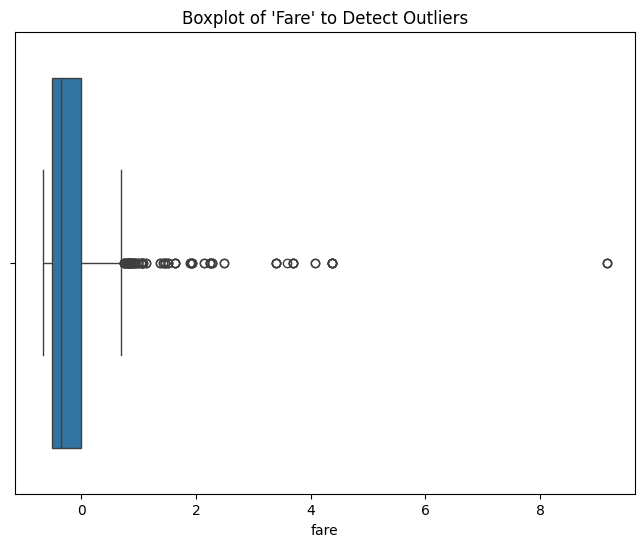


Outliers removed based on Fare > 200.

Dataset shape after removing outliers: (784, 16)


In [ ]:
# Explanation: Detecting and removing outliers helps improve the quality of the data.

# Plotting boxplot to detect outliers in 'fare'
plt.figure(figsize=(8,6))
sns.boxplot(x=data['fare'])
plt.title("Boxplot of 'Fare' to Detect Outliers")
plt.show()

# Removing outliers where 'Fare' is greater than 200
data = data[data['fare'] < 200]
print("\nOutliers removed based on Fare > 200.\n")

# Displaying the shape of the dataset after removing outliers
print("Dataset shape after removing outliers:", data.shape)

# 11. Seperate Numirical and Categorical values

In [ ]:
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64'])
categorical_features = data.select_dtypes(include=['object', 'category', 'bool'])

# Display the first few rows of numerical and categorical features
print("\nNumerical Features:\n", numerical_features.head())
print("\nCategorical Features:\n", categorical_features.head())



Numerical Features:
    survived  pclass       age  sibsp  parch      fare  family_size
0         0       3 -0.572094      1      0 -0.526825            2
1         1       1  0.594502      1      0  0.701587            2
2         1       3 -0.280445      0      0 -0.513876            1
3         1       1  0.375765      1      0  0.352760            2
4         0       3  0.375765      0      0 -0.511478            1

Categorical Features:
       sex embarked  class    who  adult_male     deck  embark_town alive  \
0    male        S  Third    man        True  Unknown  Southampton    no   
1  female        C  First  woman       False        C    Cherbourg   yes   
2  female        S  Third  woman       False  Unknown  Southampton   yes   
3  female        S  First  woman       False        C  Southampton   yes   
4    male        S  Third    man        True  Unknown  Southampton    no   

   alone  
0  False  
1  False  
2   True  
3  False  
4   True  


# 12. Data Visualization

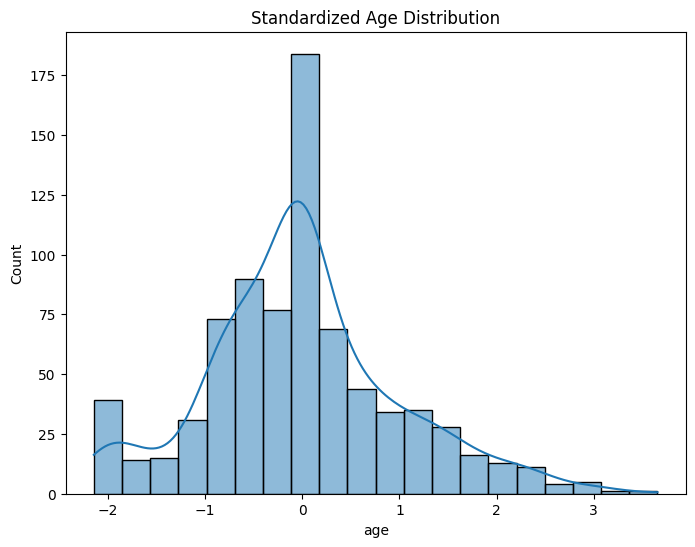

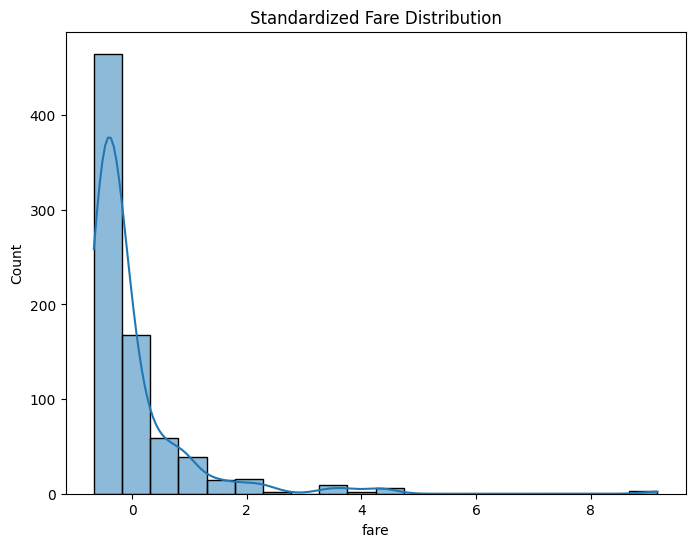

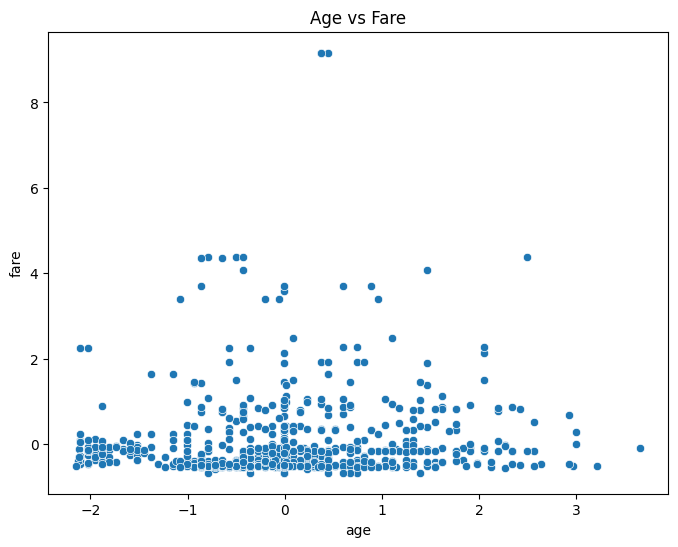

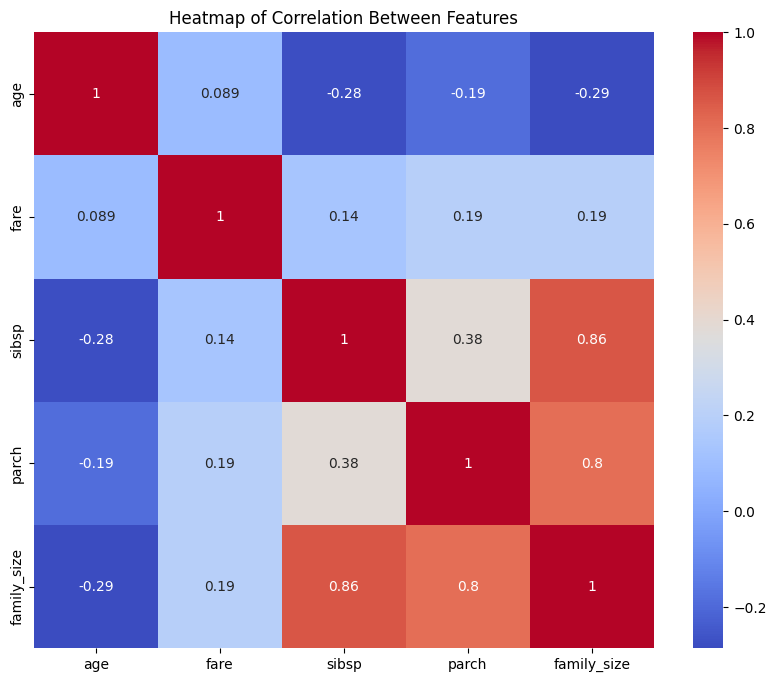

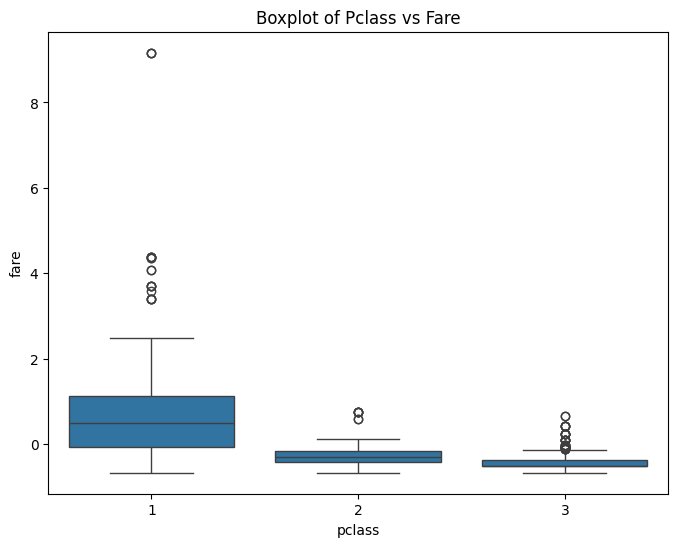

In [ ]:
# Univariate Analysis: Age and Fare Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['age'], kde=True, bins=20)
plt.title("Standardized Age Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data['fare'], kde=True, bins=20)
plt.title("Standardized Fare Distribution")
plt.show()

# Bivariate Analysis: Scatterplot of Age vs Fare
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['age'], y=data['fare'])
plt.title("Age vs Fare")
plt.show()

# Heatmap to show correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[['age', 'fare', 'sibsp', 'parch', 'family_size']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Between Features")
plt.show()

# Boxplot of 'Pclass' vs 'Fare'
plt.figure(figsize=(8,6))
sns.boxplot(x='pclass', y='fare', data=data)
plt.title('Boxplot of Pclass vs Fare')
plt.show()


# 13. Descriptive Statistics

In [ ]:
# Central Tendency for 'age' and 'fare'
mean_age = data['age'].mean()
median_age = data['age'].median()
mode_age = data['age'].mode()[0]

mean_fare = data['fare'].mean()
median_fare = data['fare'].median()
mode_fare = data['fare'].mode()[0]

print(f"\nMean Age: {mean_age}, Median Age: {median_age}, Mode Age: {mode_age}")
print(f"Mean Fare: {mean_fare}, Median Fare: {median_fare}, Mode Fare: {mode_fare}")

# Measures of Dispersion for 'age' and 'fare'
range_age = data['age'].max() - data['age'].min()
variance_age = data['age'].var()
std_dev_age = data['age'].std()

range_fare = data['fare'].max() - data['fare'].min()
variance_fare = data['fare'].var()
std_dev_fare = data['fare'].std()

print(f"\nAge - Range: {range_age}, Variance: {variance_age}, Std Dev: {std_dev_age}")
print(f"Fare - Range: {range_fare}, Variance: {variance_fare}, Std Dev: {std_dev_fare}")

# Summary of the data (Descriptive Statistics)
print("\nSummary Statistics:\n", data.describe())


Mean Age: -6.344131569286608e-17, Median Age: -0.010733935207013273, Mode Age: -0.010733935207013273
Mean Fare: -6.910571887972913e-17, Median Fare: -0.36088370160204797, Mode Fare: -0.41651719181059965

Age - Range: 5.802358217419577, Variance: 1.0012771392081738, Std Dev: 1.0006383658486087
Fare - Range: 9.82850397646729, Variance: 1.0012771392081738, Std Dev: 1.0006383658486087

Summary Statistics:
          survived      pclass           age       sibsp       parch  \
count  784.000000  784.000000  7.840000e+02  784.000000  784.000000   
mean     0.411990    2.243622 -6.344132e-17    0.522959    0.415816   
std      0.492507    0.855056  1.000638e+00    0.986231    0.836922   
min      0.000000    1.000000 -2.145541e+00    0.000000    0.000000   
25%      0.000000    1.000000 -5.720941e-01    0.000000    0.000000   
50%      0.000000    3.000000 -1.073394e-02    0.000000    0.000000   
75%      1.000000    3.000000  4.486777e-01    1.000000    1.000000   
max      1.000000    3.00

# Linear Regression

# 1. Load libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = sns.load_dataset('titanic')

# 2. Check Column Names

In [ ]:
# Check the column names in the dataset
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


# 3. Drop Irrelevant Columns

In [ ]:
# Dropping irrelevant columns from the dataset
# Since we are predicting 'fare', 'survived', 'who', 'alive', and 'alone' may not be relevant for this prediction task.
data_cleaned = data.drop(columns=['survived', 'who', 'alive', 'alone'])

# Check the updated columns after dropping irrelevant ones
print("Features in the dataset after dropping irrelevant columns:\n", data_cleaned.columns)


Features in the dataset after dropping irrelevant columns:
 Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'adult_male', 'deck', 'embark_town'],
      dtype='object')


# 4. Define Features

In [ ]:
# Define numerical and categorical features
numerical_features = ['age', 'sibsp', 'parch', 'family_size']
categorical_features = ['sex', 'embarked', 'class', 'adult_male', 'deck', 'embark_town', 'pclass']

# Display numerical and categorical features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'sibsp', 'parch', 'family_size']
Categorical Features: ['sex', 'embarked', 'class', 'adult_male', 'deck', 'embark_town', 'pclass']


# 5. Prepate Features and Target Variable

In [ ]:
# Separate features (X) and target variable (y)
X = data_cleaned.drop('fare', axis=1)  # Dropping 'fare' column from features
y = data_cleaned['fare']  # Target variable 'fare'

# Display the shape of features and target variable
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (891, 10)
Shape of y (target): (891,)


# 6. Handle Categorical Variables and Standardize Numerical Features

In [ ]:
# Handle categorical variables by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Recalculate 'family_size' after one-hot encoding (if needed)
# X['family_size'] = X['sibsp'] + X['parch'] + 1

# Standardize the numerical features
# StandardScaler will normalize numerical features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
numerical_features = ['age', 'sibsp', 'parch']  # List of numerical features to be standardized
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# 7. Split Dataset

In [ ]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#8. Initialize and train the model

## Checking for NaN values, Handling missing values and then fitting model in next code section

In [ ]:
# Check for NaN values in the training and testing sets
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())

X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Align y_train with X_train after dropping

from sklearn.impute import SimpleImputer

# Create an imputer for filling missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training set
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])

# Transform the test set (use the same imputer to maintain consistency)
X_test[numerical_features] = imputer.transform(X_test[numerical_features])


Missing values in X_train:
 pclass                       0
age                        140
sibsp                        0
parch                        0
adult_male                   0
sex_male                     0
embarked_Q                   0
embarked_S                   0
class_Second                 0
class_Third                  0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64
Missing values in X_test:
 pclass                      0
age                        37
sibsp                       0
parch                       0
adult_male                  0
sex_male                    0
embarked_Q                  0
embarked_S                  0
class_Second                0
class_Third                 0
deck_B                      0
deck_C                      0
deck_D        

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)




LinearRegression()

#9. Predict and Evaluate

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 837.1887770661497
Mean Absolute Error: 17.45671896879346
R^2 Score: 0.4589810311541912


#10. Visualize Results

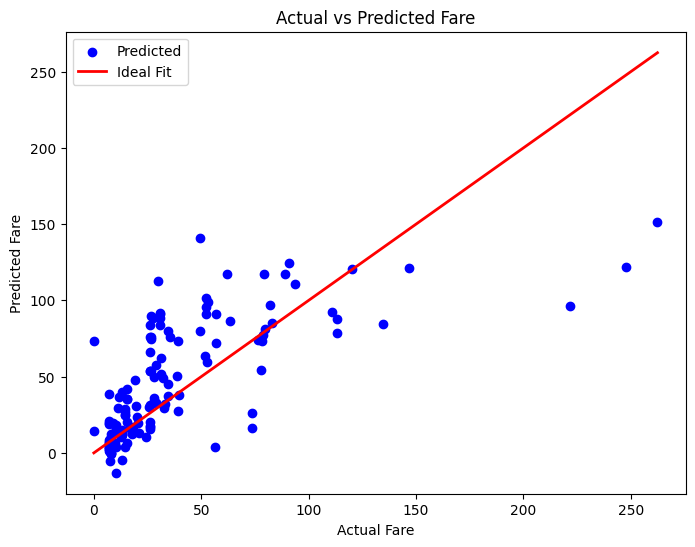

In [ ]:
# Visualizing actual vs predicted fares
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label="Ideal Fit")
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.legend()
plt.show()
